In [4]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using FUSE.IMAS
using Plots; gr();

  Activating environment at `~/Coding/julia/FUSE/Project.toml`


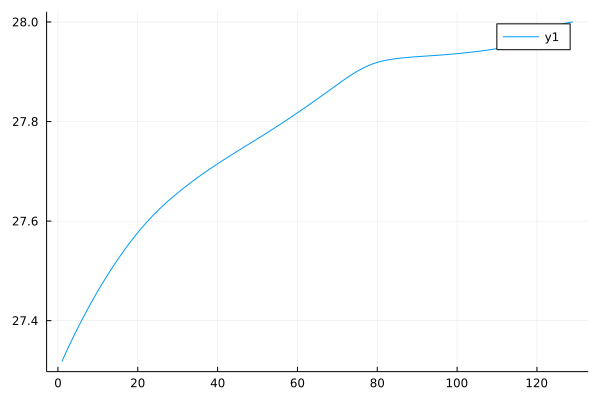

In [24]:
dd=IMAS.json2imas("/Users/meneghini/.julia/dev/FUSE/sample/CAT_eq_ods.json");
plot(dd.equilibrium.time_slice[1].profiles_1d.f)

In [52]:


# rb=FUSE.init(dd.radial_build,
#     Bmax_OH=11.0,
#     Bmax_TF=5.3,
#     gap_TF=1.0,
#     OH=0.12,
#     TF=0.37,
#     inner_shield=0.01,
#     inner_blanket=0.22,
#     inner_wall=0.01,
#     vacuum_vessel=1,
#     outer_wall=0.01,
#     outer_blanket=0.22,
#     outer_shield=0.01
# )




#FUSE.stress_calculations(dd)
IMAS.set_field_time_array(dd.core_profiles,:time,1,0.006)
IMAS.set_field_time_array(dd.core_profiles.global_quantities,:ejima,1,0.4)
IMAS.flux_surfaces(dd.equilibrium)
FUSE.init(dd.radial_build,dd.equilibrium.time_slice[1],is_nuclear_facility=true)

plot(dd.equilibrium.time_slice[1])

@recipe function plot_radial_build(rb::IMAS.radial_build)
    seriestype --> :vline
    aspect_ratio --> :equal
    linewidth --> 2
    at=0
    for l in rb.center_stack
        @series begin
            label --> l.name
            at+=l.thickness
            [at]
        end
    end
end

plot!(dd.radial_build)

FUSE.oh_actor(dd,0.006)

6.632209471004476